## Code

In [1]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [49]:
def fill_missing_inplace(df):
    # Fill missing values with the mean of the column
    tcga_df = df.filter(like='TCGA')
    tcga_df.fillna(tcga_df.mean(), inplace=True)
    df[tcga_df.columns] = tcga_df


#
def plot_histograms_by_genes(df, genes_values):
    print("Total number of unique genes: ", len(genes_values))
    selected_genes_values = genes_values

    n_cols = 5
    remainder = len(selected_genes_values) % n_cols
    n_rows = len(selected_genes_values) // n_cols + min(remainder, 1)

    _, ax = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
    ax = ax.flatten()

    tqdm_iterator = tqdm(selected_genes_values, total=len(selected_genes_values))
    for idx, gene_name in enumerate(tqdm_iterator):
        if idx >= len(ax):
            break

        tcga_df = df[df["Gene"] == gene_name].filter(like='TCGA')
        tcga_values = tcga_df.values.flatten()
        mean = tcga_values.mean()

        ax[idx].hist(tcga_values, bins=100)
        # add horizontal line for the mean
        ax[idx].axvline(
            mean,
            color='r',
            linestyle='dashed',
            linewidth=1,
        )
        ax[idx].set_title( f"{gene_name} (mean={mean:.2f})")


## Load dataset


In [3]:
normal_meth = pd.read_csv('Xijun/normal_methylation.csv')


In [4]:
tumor_meth = pd.read_csv('Xijun/tumor_methylation.csv')

In [5]:
tumor_patient_data = pd.read_csv('Xijun/tumor_patient_data.csv')
normal_patient_data = pd.read_csv('Xijun/health_patient_data.csv')

In [6]:
normal_patient_data.head()


,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,...,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_treatment_or_therapy,bcr_patient_barcode
0,TCGA-COAD,TCGA-G4-6298,Not Reported,Stage IIIB,0,not reported,Cecum,NaN,32872,"Adenocarcinoma, NOS",...,0be19452-0a78-5c95-a0df-6b37aacd9c9a,2006.0,0.0,125dd097-553a-5763-af5f-8732c8f09389,"Pharmaceutical Therapy, NOS",no,9b34cc2a-df2d-5864-87dd-26a54f604da9,"Radiation Therapy, NOS",no,TCGA-G4-6298
1,TCGA-COAD,TCGA-G4-6625,Not Reported,Stage IIA,0,not reported,Sigmoid colon,2792.0,28163,"Adenocarcinoma, NOS",...,b485e92b-3300-5a1b-9b07-2d7ebd22b396,NaN,NaN,e3aa925d-2d16-509c-9147-cc65300ff1b0,"Pharmaceutical Therapy, NOS",no,c9de9b2a-2852-51bd-b137-446c4d9fe1bd,"Radiation Therapy, NOS",no,TCGA-G4-6625
2,TCGA-COAD,TCGA-G4-6314,Not Reported,Stage IV,0,not reported,Cecum,1093.0,27958,"Adenocarcinoma, NOS",...,2d92831f-7ef0-5e37-8002-1159276605a2,NaN,NaN,3b0fcd87-0f2b-58ab-878a-52404320287c,"Pharmaceutical Therapy, NOS",yes,e4a6d7b6-9352-5b12-8bbf-9a32a4ac027b,"Radiation Therapy, NOS",no,TCGA-G4-6314
3,TCGA-COAD,TCGA-A6-2682,Not Reported,Stage IV,0,not reported,"Colon, NOS",NaN,25683,"Adenocarcinoma, NOS",...,2f8f5b9f-bad1-5635-89c9-71b352132c9e,2010.0,424.0,4a318ee5-fa3e-5fa7-bc0d-37d2372f97a6,"Pharmaceutical Therapy, NOS",yes,cdd15d7c-e705-57fd-a8b6-c7105dc1d012,"Radiation Therapy, NOS",no,TCGA-A6-2682
4,TCGA-COAD,TCGA-AA-3506,Not Reported,Stage I,0,not reported,"Colon, NOS",1765.0,28275,"Adenocarcinoma, NOS",...,3cd15173-8bda-5f0b-8803-cede5957b0e2,NaN,NaN,77d10805-2fb4-5b65-b887-36c0804a8e43,"Pharmaceutical Therapy, NOS",no,c4f8a138-4fcb-5b22-9d1b-709db4028d2d,"Radiation Therapy, NOS",no,TCGA-AA-3506


## Patient data

### Prepare Tumor patient DataFrame

In [7]:
COLS = [
    "barcode",
    "race",
    "gender",
    "ajcc_pathologic_stage",
    "tissue_or_organ_of_origin",
    "primary_diagnosis",
    "prior_malignancy",
]

tumor_patient_selected_df = tumor_patient_data[COLS]
tumor_patient_selected_df.set_index("barcode", inplace=True)

tumor_patient_selected_df


,race,gender,ajcc_pathologic_stage,tissue_or_organ_of_origin,primary_diagnosis,prior_malignancy
barcode,,,,,,
TCGA-AD-6895-01A-11D-1926-05,white,male,Stage IIIB,Cecum,"Adenocarcinoma, NOS",yes
TCGA-CM-6676-01A-11D-1837-05,white,male,Stage I,Sigmoid colon,"Adenocarcinoma, NOS",no
TCGA-CM-6680-01A-11D-1837-05,white,female,Stage IIIB,Cecum,"Adenocarcinoma, NOS",no
TCGA-CK-4950-01A-01D-1721-05,black or african american,female,Stage IIIB,Cecum,Mucinous adenocarcinoma,no
TCGA-D5-6529-01A-11D-1772-05,white,male,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no
...,...,...,...,...,...,...
TCGA-CM-5860-01A-01D-1651-05,white,male,Stage IIA,Ascending colon,"Adenocarcinoma, NOS",no
TCGA-CM-6674-01A-11D-1837-05,white,male,Stage IIA,Hepatic flexure of colon,"Adenocarcinoma, NOS",no
TCGA-A6-2677-01A-01D-A27A-05,white,female,Stage IIIC,"Colon, NOS","Adenocarcinoma, NOS",yes


In [8]:
# save to csv
#tumor_patient_selected_df.to_csv('tumor_patient_data.csv', index=False)

### Prepare Normal patient DataFrame

In [9]:
COLS = [
    "submitter_id",
    "race",
    "gender",
    "ajcc_pathologic_stage",
    "tissue_or_organ_of_origin",
    "primary_diagnosis",
    "prior_malignancy",
]
normal_patient_data_df = normal_patient_data[COLS]

normal_patient_data_df.set_index("submitter_id", inplace=True)

normal_patient_data_df.head()

,race,gender,ajcc_pathologic_stage,tissue_or_organ_of_origin,primary_diagnosis,prior_malignancy
submitter_id,,,,,,
TCGA-G4-6298,black or african american,male,Stage IIIB,Cecum,"Adenocarcinoma, NOS",yes
TCGA-G4-6625,white,female,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",yes
TCGA-G4-6314,white,female,Stage IV,Cecum,"Adenocarcinoma, NOS",yes
TCGA-A6-2682,white,male,Stage IV,"Colon, NOS","Adenocarcinoma, NOS",yes
TCGA-AA-3506,not reported,male,Stage I,"Colon, NOS","Adenocarcinoma, NOS",yes


In [10]:
normal_patient_data_df.head()

,race,gender,ajcc_pathologic_stage,tissue_or_organ_of_origin,primary_diagnosis,prior_malignancy
submitter_id,,,,,,
TCGA-G4-6298,black or african american,male,Stage IIIB,Cecum,"Adenocarcinoma, NOS",yes
TCGA-G4-6625,white,female,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",yes
TCGA-G4-6314,white,female,Stage IV,Cecum,"Adenocarcinoma, NOS",yes
TCGA-A6-2682,white,male,Stage IV,"Colon, NOS","Adenocarcinoma, NOS",yes
TCGA-AA-3506,not reported,male,Stage I,"Colon, NOS","Adenocarcinoma, NOS",yes


## Tumor data

### Prepare DataFrame

In [11]:
tumor_tcga_df = tumor_meth.drop(columns=["Composite", "Coordinate", "Chr"])
tumor_tcga_df.head()

# Fill missing TCGA values with the mean of the column
fill_missing_inplace(tumor_tcga_df)

# Fill missing gene names with "Unknown"
tumor_tcga_df.fillna({"Gene": "Unknown"}, inplace=True)

tumor_tcga_df.head()

/var/folders/j_/gdfklcjj5512n290js354_th0000gn/T/ipykernel_50503/773332759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcga_df.fillna(tcga_df.mean(), inplace=True)


,Gene,TCGA-AD-6895-01A-11D-1926-05,TCGA-CM-6676-01A-11D-1837-05,TCGA-CM-6680-01A-11D-1837-05,TCGA-CK-4950-01A-01D-1721-05,TCGA-D5-6529-01A-11D-1772-05,TCGA-QG-A5Z1-01A-11D-A28O-05,TCGA-CM-5862-01A-01D-1651-05,TCGA-QL-A97D-01A-12D-A40X-05,TCGA-AZ-4313-01A-01D-1407-05,...,TCGA-CM-5863-01A-21D-1837-05,TCGA-AY-A71X-01A-12D-A36Y-05,TCGA-A6-6782-01A-11D-1837-05,TCGA-D5-6920-01A-11D-1926-05,TCGA-A6-6140-01A-11D-1772-05,TCGA-CM-5860-01A-01D-1651-05,TCGA-CM-6674-01A-11D-1837-05,TCGA-A6-2677-01A-01D-A27A-05,TCGA-G4-6294-01A-11D-1772-05,TCGA-G4-6310-01A-11D-1721-05
0,RBL2,0.260262,0.178824,0.140889,0.212497,0.275254,0.169977,0.140766,0.150035,0.178164,...,0.259954,0.163591,0.118633,0.157041,0.099936,0.152086,0.299299,0.251112,0.147915,0.093454
1,C3orf35,0.960312,0.974227,0.938666,0.969783,0.981587,0.941921,0.929226,0.964390,0.930953,...,0.942099,0.970797,0.962571,0.963844,0.941048,0.937487,0.971945,0.966982,0.987259,0.972124
2,FNDC3B,0.914848,0.906537,0.878166,0.908821,0.885387,0.935270,0.925867,0.903592,0.846369,...,0.902738,0.918945,0.897739,0.906517,0.933717,0.893489,0.925771,0.934900,0.851424,0.915040
3,Unknown,0.594698,0.326368,0.383039,0.573923,0.528109,0.496904,0.105846,0.373725,0.108807,...,0.403702,0.637717,0.358213,0.712315,0.104913,0.763970,0.165453,0.484937,0.483175,0.093106
4,VDAC3,0.910359,0.891232,0.900482,0.927560,0.897404,0.935421,0.924609,0.920240,0.884173,...,0.905868,0.901754,0.903713,0.916210,0.910943,0.908626,0.927390,0.938267,0.932549,0.913739


### How many unique genes

In [12]:
all_tumor_genes = tumor_tcga_df["Gene"].unique()
all_tumor_genes.size

23335

In [53]:
# Describe range of numbers for each gene
x = tumor_meth.head()
x.set_index("Gene").filter(like='TCGA').T.describe()

Gene,RBL2,C3orf35,FNDC3B,NaN,VDAC3
count,313.000000,314.000000,314.000000,310.000000,314.000000
mean,0.196560,0.957474,0.912044,0.437442,0.907256
std,0.113966,0.028328,0.036113,0.245985,0.026890
min,0.043695,0.744843,0.513743,0.057839,0.785472
25%,0.113674,0.955630,0.903057,0.177986,0.896717
50%,0.162727,0.964363,0.919021,0.446030,0.910995
75%,0.245892,0.970737,0.930502,0.649407,0.924947
max,0.666286,0.987259,0.962492,0.911361,0.953267


<Axes: >

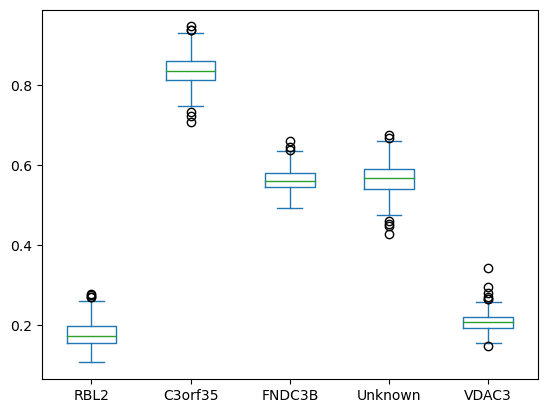

In [14]:
GENES = all_tumor_genes[:5]

tumor_genes_df = tumor_tcga_df.groupby("Gene").mean()
tumor_genes_df.loc[GENES].T.plot.box()
# tumor_genes_df["mean"] = tumor_genes_df.filter(like='TCGA').T.mean()

Total number of unique genes:  20


100%|██████████| 20/20 [00:01<00:00, 19.05it/s]


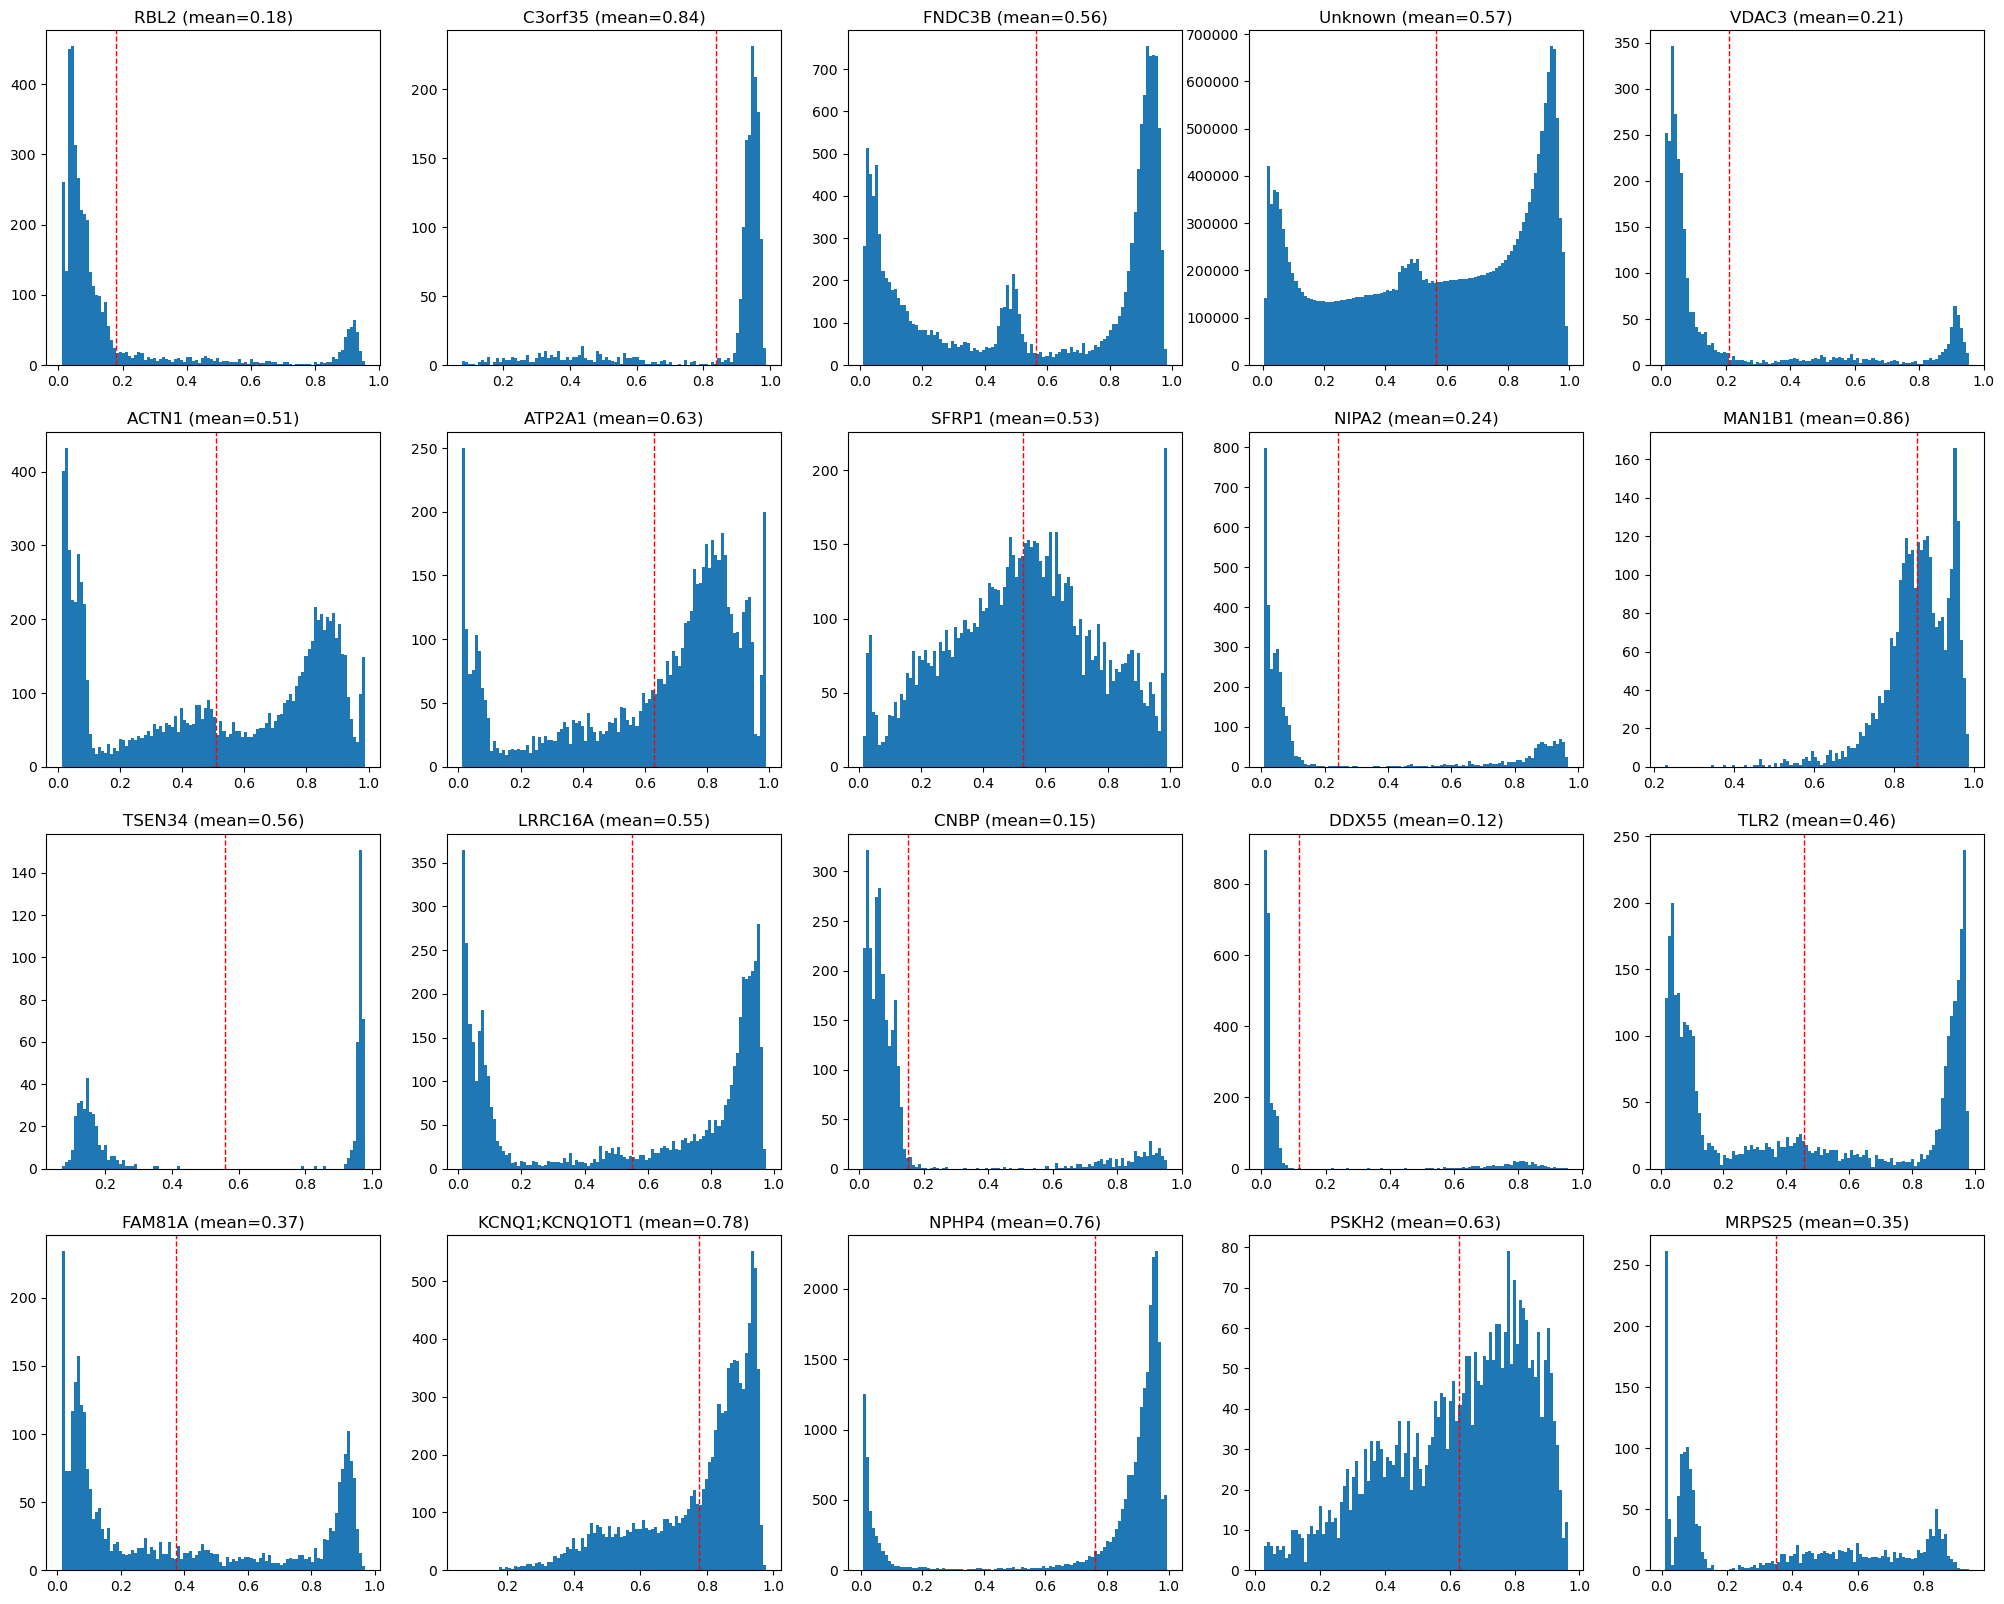

In [15]:
plot_histograms_by_genes(tumor_tcga_df, all_tumor_genes[:20])

### Join with tumor patients

In [16]:
# compare each columnd of genes_df with genes_df['mean']
# is_above_df = tumor_genes_df.filter(like='TCGA').apply(lambda col: col > tumor_genes_df['mean'])

# genes_mean_df = is_above_df.T.join(tumor_patient_selected_df)
# genes_mean_df[genes_mean_df["ajcc_pathologic_stage"] == "Stage I"]["A1BG"].value_counts()

In [17]:
tumor_patient_genes_df = tumor_genes_df.T.join(tumor_patient_selected_df)
tumor_patient_genes_df.head()


,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1;NPSR1,AAAS,...,ZZEF1,ZZEF1;CYB5D2,ZZZ3,psiTPTE22,race,gender,ajcc_pathologic_stage,tissue_or_organ_of_origin,primary_diagnosis,prior_malignancy
TCGA-AD-6895-01A-11D-1926-05,0.429012,0.701903,0.681908,0.745281,0.808667,0.723641,0.572828,0.715628,0.833209,0.072890,...,0.911530,0.050716,0.145276,0.520764,white,male,Stage IIIB,Cecum,"Adenocarcinoma, NOS",yes
TCGA-CM-6676-01A-11D-1837-05,0.339258,0.610113,0.516409,0.893579,0.579285,0.585019,0.450905,0.457147,0.788723,0.059938,...,0.899532,0.041856,0.127122,0.536500,white,male,Stage I,Sigmoid colon,"Adenocarcinoma, NOS",no
TCGA-CM-6680-01A-11D-1837-05,0.423164,0.597792,0.540353,0.798118,0.441355,0.625682,0.363347,0.310477,0.727596,0.064618,...,0.825938,0.042162,0.082695,0.595742,white,female,Stage IIIB,Cecum,"Adenocarcinoma, NOS",no
TCGA-CK-4950-01A-01D-1721-05,0.373137,0.549916,0.665646,0.869837,0.701512,0.668499,0.499124,0.425764,0.716510,0.050306,...,0.871656,0.034361,0.101643,0.519737,black or african american,female,Stage IIIB,Cecum,Mucinous adenocarcinoma,no
TCGA-D5-6529-01A-11D-1772-05,0.383516,0.550830,0.600044,0.895390,0.655990,0.565236,0.439298,0.491191,0.695722,0.058800,...,0.884117,0.043104,0.131224,0.439135,white,male,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no


## Normal data

### Initial shape of the data

In [18]:
normal_meth.shape

(421192, 42)

### Drop unused columns

In [19]:
normal_tcga_df = normal_meth.drop(columns=["Composite", "Coordinate", "Chr"])
normal_tcga_df.head()

,Gene,TCGA-AZ-6599-11A-01D-1772-05,TCGA-AA-3510-11A-01D-1407-05,TCGA-A6-2680-11A-01D-1551-05,TCGA-AA-3697-11A-01D-1721-05,TCGA-AA-3713-11A-01D-1721-05,TCGA-G4-6311-11A-01D-1721-05,TCGA-AZ-6601-11A-01D-1772-05,TCGA-G4-6625-11A-01D-1772-05,TCGA-G4-6314-11A-01D-1721-05,...,TCGA-AZ-6598-11A-01D-1772-05,TCGA-A6-2685-11A-01D-1551-05,TCGA-AA-3660-11A-01D-1721-05,TCGA-AA-3495-11A-01D-1407-05,TCGA-AA-3488-11A-01D-1407-05,TCGA-A6-2671-11A-01D-1551-05,TCGA-A6-4107-11A-01D-1551-05,TCGA-A6-5667-11A-01D-1721-05,TCGA-AA-3712-11A-01D-1721-05,TCGA-A6-2681-11A-01D-1551-05
0,RBL2,0.226275,0.303324,0.125066,0.280129,0.244356,0.273938,0.315957,0.278584,0.178748,...,0.360986,0.217625,0.219198,0.293632,0.347823,0.255811,0.227811,0.263448,0.268198,0.193307
1,C3orf35,0.971428,0.961275,0.971483,0.966788,0.971022,0.970635,0.964338,0.972758,0.968630,...,0.965948,0.969901,0.973317,0.953509,0.960836,0.970877,0.960568,0.978051,0.966848,0.963620
2,FNDC3B,0.946440,0.903452,0.927842,0.912049,0.915502,0.883508,0.922224,0.929486,0.915334,...,0.861270,0.933757,0.925467,0.927851,0.885518,0.922863,0.911556,0.939451,0.915853,0.924844
3,NaN,0.145595,0.174631,0.132429,0.180852,0.166291,0.183968,0.199307,0.172675,0.126343,...,0.191375,0.152972,0.171301,0.184326,0.246507,0.246969,0.119693,0.164930,0.191315,0.161333
4,VDAC3,0.928182,0.896431,0.906798,0.885358,0.893949,0.908848,0.903016,0.920844,0.923916,...,0.874034,0.899074,0.918562,0.900073,0.900356,0.903949,0.873665,0.913556,0.884515,0.910430


### Fill missing values

In [20]:
# Fill missing TCGA values with the mean of the column
fill_missing_inplace(normal_tcga_df)

# Fill missing gene names with "Unknown"
normal_tcga_df.fillna({"Gene": "Unknown"}, inplace=True)

normal_tcga_df.head()

/var/folders/j_/gdfklcjj5512n290js354_th0000gn/T/ipykernel_50503/773332759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcga_df.fillna(tcga_df.mean(), inplace=True)


,Gene,TCGA-AZ-6599-11A-01D-1772-05,TCGA-AA-3510-11A-01D-1407-05,TCGA-A6-2680-11A-01D-1551-05,TCGA-AA-3697-11A-01D-1721-05,TCGA-AA-3713-11A-01D-1721-05,TCGA-G4-6311-11A-01D-1721-05,TCGA-AZ-6601-11A-01D-1772-05,TCGA-G4-6625-11A-01D-1772-05,TCGA-G4-6314-11A-01D-1721-05,...,TCGA-AZ-6598-11A-01D-1772-05,TCGA-A6-2685-11A-01D-1551-05,TCGA-AA-3660-11A-01D-1721-05,TCGA-AA-3495-11A-01D-1407-05,TCGA-AA-3488-11A-01D-1407-05,TCGA-A6-2671-11A-01D-1551-05,TCGA-A6-4107-11A-01D-1551-05,TCGA-A6-5667-11A-01D-1721-05,TCGA-AA-3712-11A-01D-1721-05,TCGA-A6-2681-11A-01D-1551-05
0,RBL2,0.226275,0.303324,0.125066,0.280129,0.244356,0.273938,0.315957,0.278584,0.178748,...,0.360986,0.217625,0.219198,0.293632,0.347823,0.255811,0.227811,0.263448,0.268198,0.193307
1,C3orf35,0.971428,0.961275,0.971483,0.966788,0.971022,0.970635,0.964338,0.972758,0.968630,...,0.965948,0.969901,0.973317,0.953509,0.960836,0.970877,0.960568,0.978051,0.966848,0.963620
2,FNDC3B,0.946440,0.903452,0.927842,0.912049,0.915502,0.883508,0.922224,0.929486,0.915334,...,0.861270,0.933757,0.925467,0.927851,0.885518,0.922863,0.911556,0.939451,0.915853,0.924844
3,Unknown,0.145595,0.174631,0.132429,0.180852,0.166291,0.183968,0.199307,0.172675,0.126343,...,0.191375,0.152972,0.171301,0.184326,0.246507,0.246969,0.119693,0.164930,0.191315,0.161333
4,VDAC3,0.928182,0.896431,0.906798,0.885358,0.893949,0.908848,0.903016,0.920844,0.923916,...,0.874034,0.899074,0.918562,0.900073,0.900356,0.903949,0.873665,0.913556,0.884515,0.910430


### How many unique genes are there in the normal dataset?

In [21]:
all_normal_genes = normal_tcga_df["Gene"].unique()

all_normal_genes.size

23950

### Box plot

<Axes: >

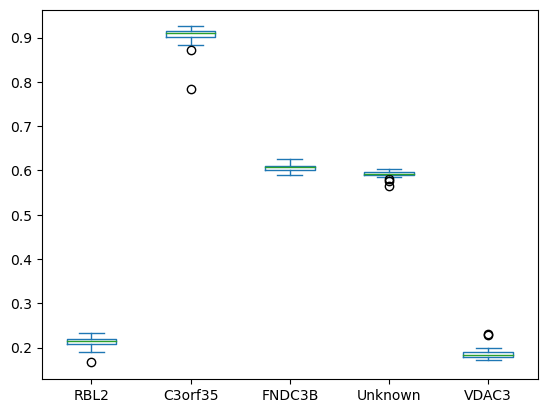

In [22]:
GENES = all_normal_genes[:5]

normal_genes_df = normal_tcga_df.groupby("Gene").mean()
normal_genes_df.loc[GENES].T.plot.box()
# normal_genes_df["mean"] = normal_genes_df.filter(like='TCGA').T.mean()

### Histogram

Total number of unique genes:  20


100%|██████████| 20/20 [00:00<00:00, 26.38it/s]


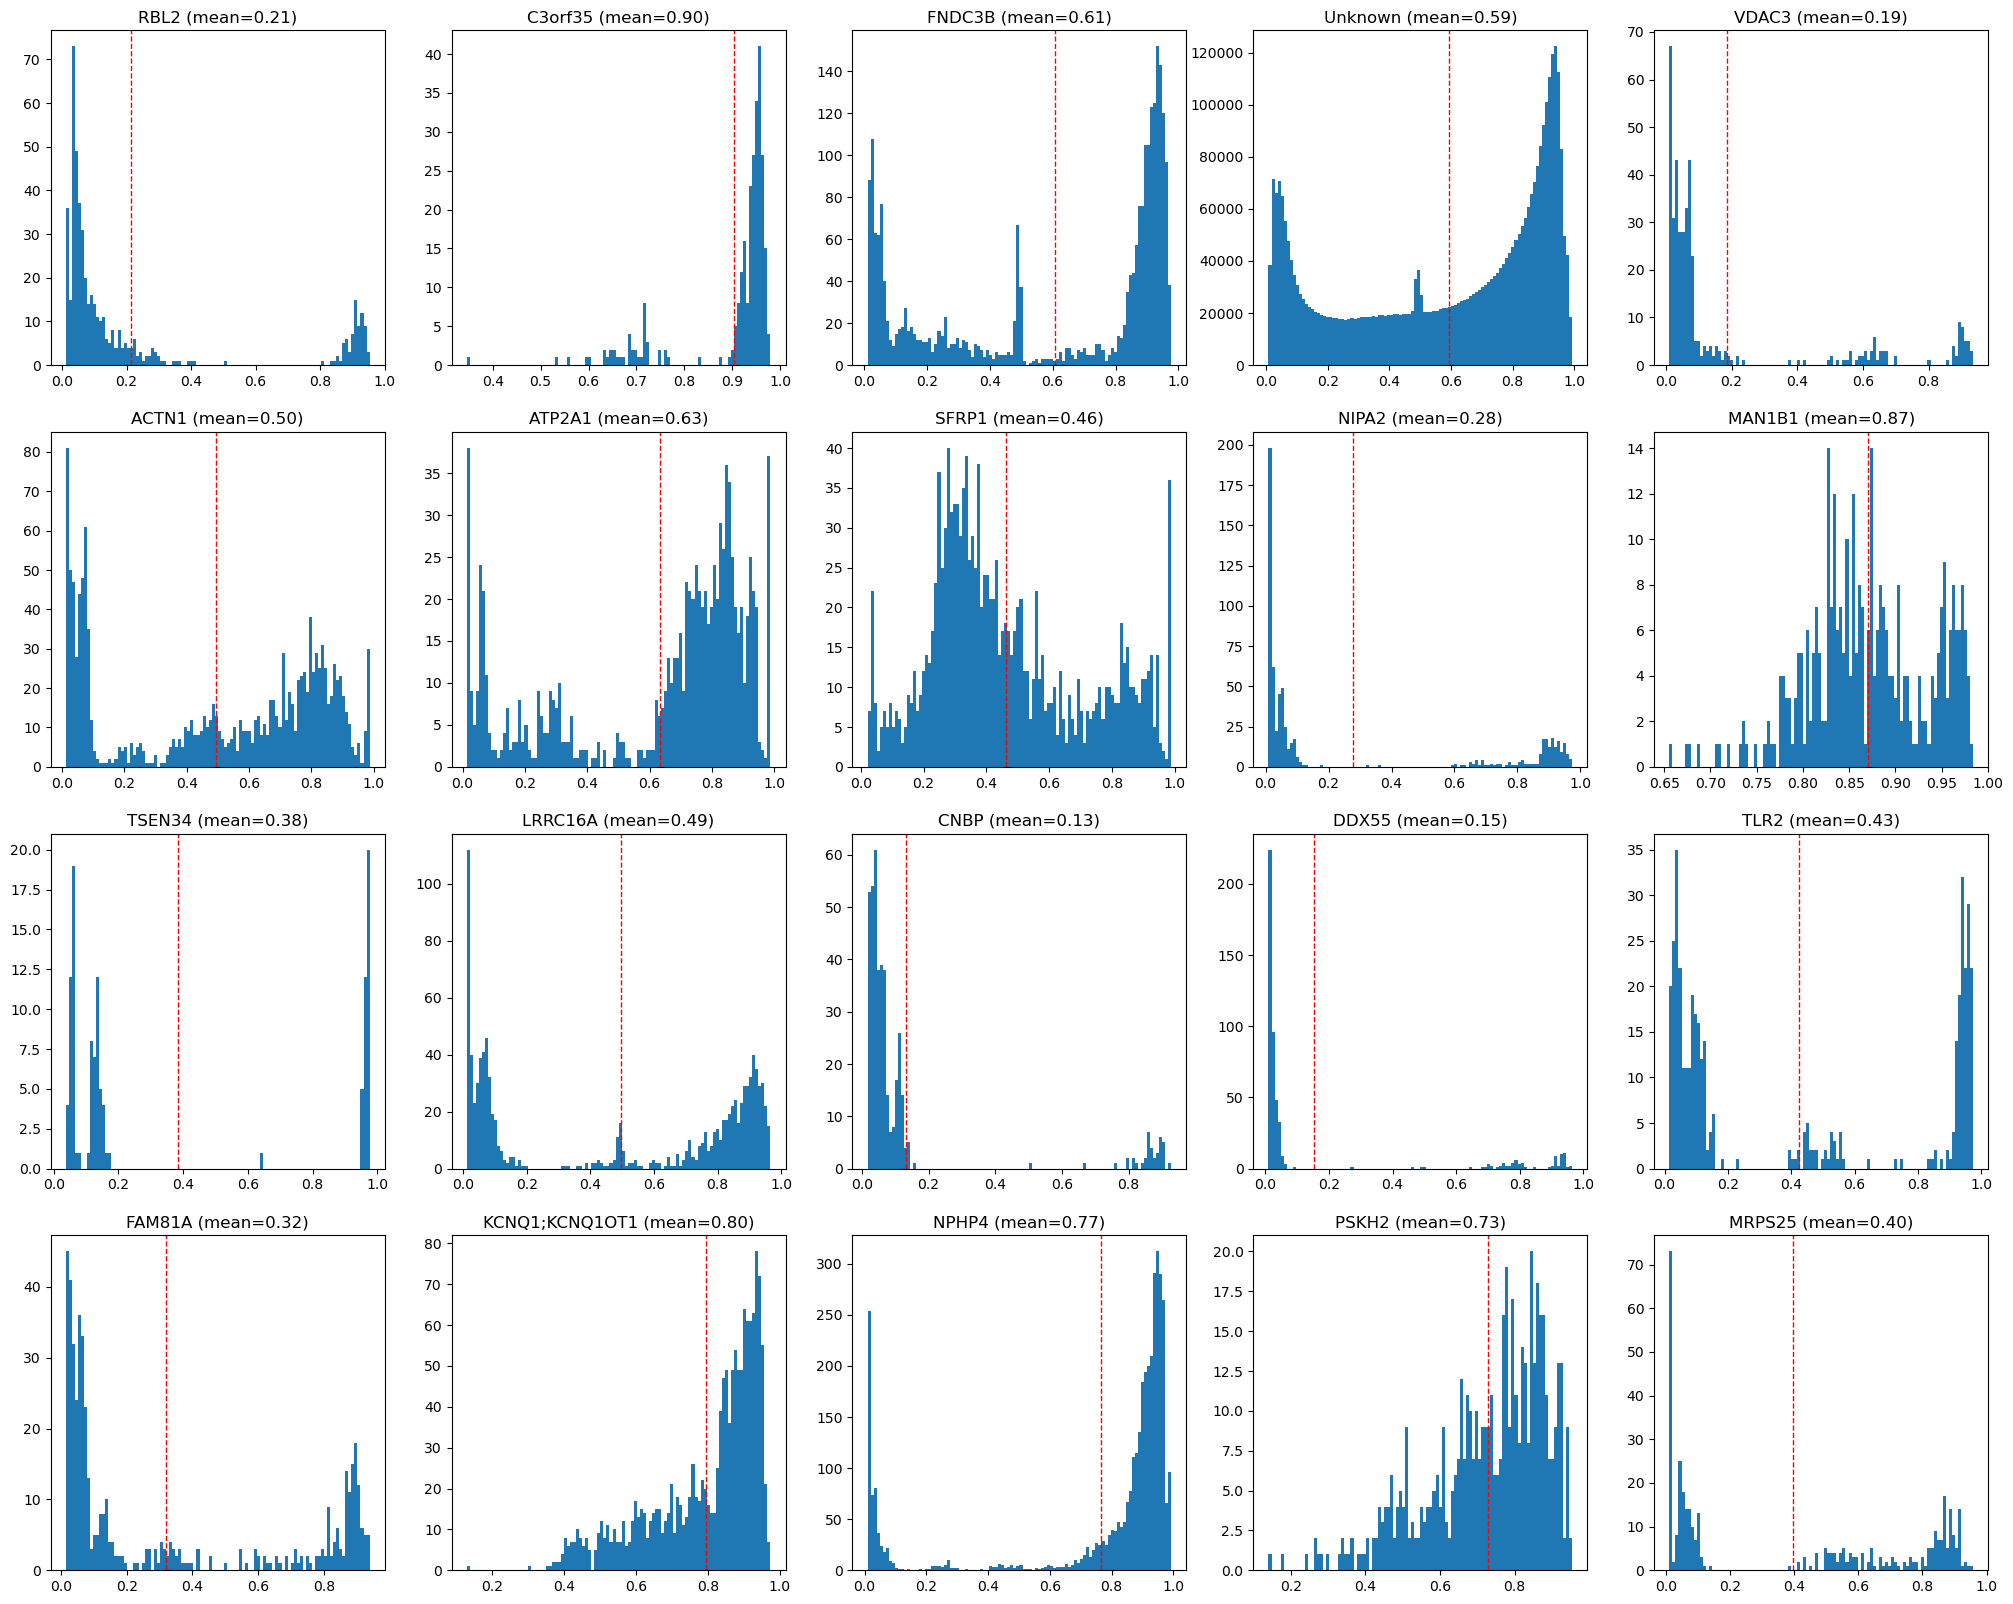

In [23]:
plot_histograms_by_genes(
    normal_tcga_df,
    all_normal_genes[:20],
)

### Seach patients data by gen name

In [24]:
normal_genes_df.loc["ZZZ3"]

TCGA-AZ-6599-11A-01D-1772-05    0.140951
TCGA-AA-3510-11A-01D-1407-05    0.141011
TCGA-A6-2680-11A-01D-1551-05    0.140360
TCGA-AA-3697-11A-01D-1721-05    0.148916
TCGA-AA-3713-11A-01D-1721-05    0.139984
TCGA-G4-6311-11A-01D-1721-05    0.142596
TCGA-AZ-6601-11A-01D-1772-05    0.156904
TCGA-G4-6625-11A-01D-1772-05    0.148343
TCGA-G4-6314-11A-01D-1721-05    0.137188
TCGA-G4-6298-11A-01D-1721-05    0.134032
TCGA-AA-3506-11A-01D-1407-05    0.146848
TCGA-A6-2682-11A-01D-1551-05    0.138163
TCGA-AA-3655-11A-01D-1721-05    0.154137
TCGA-AZ-6600-11A-01D-1772-05    0.149209
TCGA-AA-3502-11A-01D-1407-05    0.156322
TCGA-AA-3494-11A-01D-1407-05    0.156028
TCGA-G4-6322-11A-01D-1721-05    0.146078
TCGA-G4-6295-11A-01D-1721-05    0.128030
TCGA-AA-3492-11A-01D-1407-05    0.140032
TCGA-AA-3663-11A-01D-1721-05    0.146465
TCGA-A6-2684-11A-01D-1551-05    0.136757
TCGA-G4-6320-11A-01D-1721-05    0.146648
TCGA-A6-2675-11A-01D-1721-05    0.205857
TCGA-AA-3509-11A-01D-1407-05    0.155083
TCGA-A6-2686-11A

In [25]:
normal_genes_df.T.join(normal_patient_data_df).head()

,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1;NPSR1,AAAS,...,ZZEF1;CYB5D2,ZZZ3,psiTPTE22,tAKR,race,gender,ajcc_pathologic_stage,tissue_or_organ_of_origin,primary_diagnosis,prior_malignancy
TCGA-AZ-6599-11A-01D-1772-05,0.173459,0.699759,0.625566,0.883819,0.769572,0.770199,0.399156,0.710352,0.811716,0.074865,...,0.040084,0.140951,0.463533,0.812237,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3510-11A-01D-1407-05,0.193166,0.733415,0.628222,0.809538,0.760873,0.753446,0.393775,0.649341,0.786809,0.078993,...,0.037263,0.141011,0.469886,0.769889,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A6-2680-11A-01D-1551-05,0.231717,0.660256,0.612905,0.889654,0.813186,0.765377,0.409025,0.644347,0.796126,0.076508,...,0.038808,0.140360,0.560845,0.900729,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3697-11A-01D-1721-05,0.208678,0.780193,0.621041,0.824304,0.772013,0.809496,0.394157,0.669061,0.807992,0.063454,...,0.037713,0.148916,0.380280,0.789235,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3713-11A-01D-1721-05,0.184326,0.757188,0.624947,0.873310,0.787505,0.776688,0.398771,0.657519,0.790986,0.073287,...,0.038475,0.139984,0.421151,0.773581,NaN,NaN,NaN,NaN,NaN,NaN


## Compare

In [26]:
normal_tcga_df.shape

(421192, 39)

In [27]:
tumor_tcga_df.shape

(317999, 315)

In [28]:
all_genes = list(set(all_normal_genes) | set(all_tumor_genes))

print("all_normal_genes: ", len(all_normal_genes))
print("all_tumor_genes : ", len(all_tumor_genes))
print("all_genes       : ", len(all_genes))

all_normal_genes:  23950
all_tumor_genes :  23335
all_genes       :  23950


100%|██████████| 15/15 [00:01<00:00, 13.22it/s]


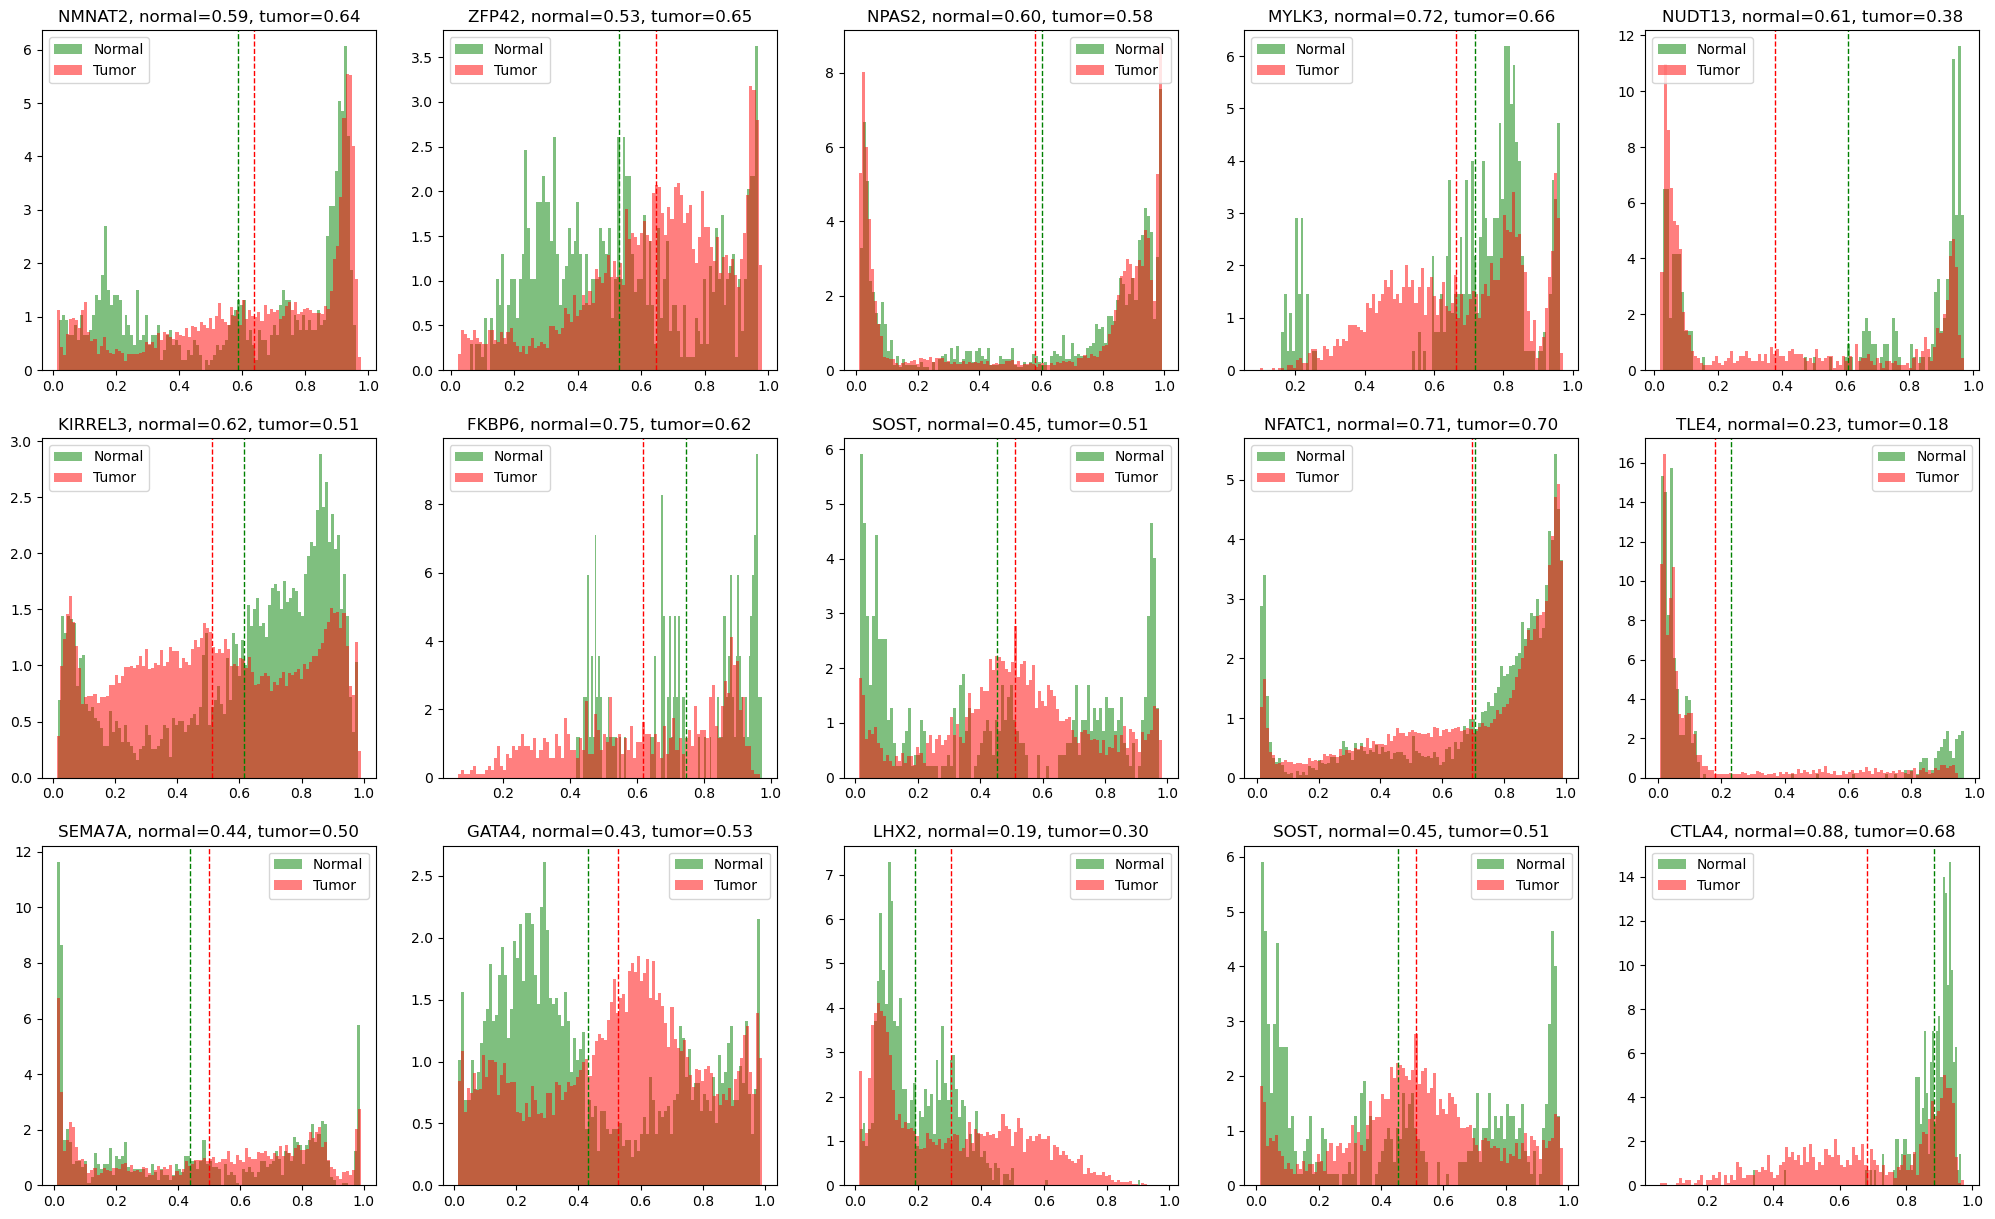

In [29]:
# selected_genes_values = all_genes[:10]
selected_genes_values = [
    "NMNAT2",
    "ZFP42",
    "NPAS2",
    "MYLK3",
    "NUDT13",
    "KIRREL3",
    "FKBP6",
    "SOST",
    "NFATC1",
    "TLE4",
    "SEMA7A",
    "GATA4",
    "LHX2",
    "SOST",
    "CTLA4",
]

n_cols = 5

remainder = len(selected_genes_values) % n_cols
n_rows = len(selected_genes_values) // n_cols + min(remainder, 1)

_, ax = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
ax = ax.flatten()

tqdm_iterator = tqdm(selected_genes_values, total=len(selected_genes_values))
for idx, gene_name in enumerate(tqdm_iterator):
    if idx >= len(ax):
        break

    dfs = [
        (normal_tcga_df, "Normal", 'green'),
        (tumor_tcga_df, "Tumor", 'red'),
    ]
    means = []
    for df, df_name, color in dfs:
        tcga_df = df[df["Gene"] == gene_name].filter(like='TCGA')
        tcga_values = tcga_df.values.flatten()
        mean = tcga_values.mean()

        ax[idx].hist(tcga_values, bins=100, alpha=0.5, label=df_name, color=color, density=True)
        # add horizontal line for the mean
        ax[idx].axvline(
            mean,
            color=color,
            linestyle='dashed',
            linewidth=1,
        )
        means.append(mean)

    ax[idx].legend()
    ax[idx].set_title(f"{gene_name}, normal={means[0]:.2f}, tumor={means[1]:.2f}")


## ML

In [172]:
GENES = [
    "NMNAT2",
    "ZFP42",
    "NPAS2",
    "MYLK3",
    "NUDT13",
    "KIRREL3",
    "FKBP6",
    "SOST",
    "NFATC1",
    "TLE4",
    "SEMA7A",
    "GATA4",
    "LHX2",
    "SOST",
    "CTLA4",
]

tumor_patients_df = tumor_genes_df.T[GENES]
tumor_patients_df["Cancer"] = 1

normal_patients_df = normal_genes_df.T[GENES]
normal_patients_df["Cancer"] = 0

In [174]:
all_model_data_df = pd.concat([tumor_patients_df, normal_patients_df])
all_model_data_df

Gene,NMNAT2,ZFP42,NPAS2,MYLK3,NUDT13,KIRREL3,FKBP6,SOST,NFATC1,TLE4,SEMA7A,GATA4,LHX2,SOST,CTLA4,Cancer
TCGA-AD-6895-01A-11D-1926-05,0.682628,0.682145,0.573458,0.707445,0.371412,0.564463,0.678765,0.562023,0.777122,0.238677,0.648781,0.586876,0.496524,0.562023,0.655916,1
TCGA-CM-6676-01A-11D-1837-05,0.622841,0.682640,0.593266,0.670564,0.364583,0.489864,0.627150,0.319166,0.673608,0.145216,0.507808,0.515309,0.239862,0.319166,0.725840,1
TCGA-CM-6680-01A-11D-1837-05,0.547302,0.691820,0.571586,0.603559,0.333372,0.460003,0.589463,0.507968,0.645519,0.172948,0.466335,0.569168,0.245519,0.507968,0.695328,1
TCGA-CK-4950-01A-01D-1721-05,0.660586,0.635290,0.565221,0.677107,0.353392,0.557273,0.640555,0.502642,0.757625,0.185156,0.506427,0.545233,0.372869,0.502642,0.835094,1
TCGA-D5-6529-01A-11D-1772-05,0.675190,0.652985,0.583557,0.713868,0.401439,0.581105,0.749436,0.532578,0.737083,0.203826,0.488322,0.577419,0.277346,0.532578,0.658897,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A6-2671-11A-01D-1551-05,0.617451,0.654424,0.595587,0.727367,0.617253,0.642588,0.757980,0.464321,0.713522,0.235877,0.453189,0.478117,0.217468,0.464321,0.899051,0
TCGA-A6-4107-11A-01D-1551-05,0.571803,0.467165,0.598004,0.690380,0.603856,0.602762,0.740355,0.463178,0.705979,0.226634,0.442412,0.399860,0.173364,0.463178,0.901342,0
TCGA-A6-5667-11A-01D-1721-05,0.573905,0.454246,0.602577,0.719651,0.619611,0.641445,0.772660,0.458395,0.711453,0.229367,0.441138,0.368528,0.147746,0.458395,0.906273,0
TCGA-AA-3712-11A-01D-1721-05,0.599653,0.523390,0.606637,0.720182,0.595669,0.640895,0.763875,0.455365,0.718299,0.231010,0.434407,0.426619,0.203145,0.455365,0.882702,0


### Train validation split

In [183]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = all_model_data_df.drop(columns=["Cancer"])
y = all_model_data_df["Cancer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

### Neural Network

In [186]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=1000)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

## G

### Filter out genes with ';' in its name

In [30]:
print("Before:", len(all_genes))
all_genes_without_long = [gen for gen in all_genes if ';' not in gen]
print("After:", len(all_genes_without_long))

Before: 23950
After: 18711


In [54]:
normal_genes_names = set(gene for gene in normal_genes_df.index if ';' not in gene)
tumor_genes_names = set(gene for gene in tumor_genes_df.index if ';' not in gene)
#[aaa; sss; ddd, hhhh;uuuu, rrr]
#находим только общие гены
common_gene_names = list(normal_genes_names & tumor_genes_names)
print(len(common_gene_names))

18407


### Prepare data

In [47]:
import warnings
warnings.filterwarnings('ignore')

GENES = [
    "NMNAT2",
    "ZFP42",
    "NPAS2",
    "MYLK3",
    "NUDT13",
    "KIRREL3",
    "FKBP6",
    "NFATC1",
    "TLE4",
    "SEMA7A",
    "GATA4",
    "LHX2",
    "SOST",
    "CTLA4",
]

tumor_tcga_df = tumor_meth.drop(columns=["Composite", "Coordinate", "Chr"])
tumor_tcga_df.fillna({"Gene": "Unknown"}, inplace=True)

normal_tcga_df = normal_meth.drop(columns=["Composite", "Coordinate", "Chr"])
normal_tcga_df.fillna({"Gene": "Unknown"}, inplace=True)

#для каждого пациента и для каждого гена
gene_value_dfs = []
for gene in tqdm(GENES):
    tumor_gene_df = tumor_tcga_df[tumor_tcga_df["Gene"] == gene]
    normal_gene_df = normal_tcga_df[normal_tcga_df["Gene"] == gene]

    gene_dfs = [
        (normal_gene_df, 0),
        (tumor_gene_df, 1),
    ]
    for gene_df, cancer in gene_dfs:
        for col in gene_df.columns:
            if "TCGA" in col:
                df = gene_df[["Gene", col]]
                if df.size > 0:
                    df.loc[:, "Cancer"] = cancer
                    df.columns = ["Gene", "Value", "Cancer"]
                    gene_value_dfs.append(df)

#concat - слияние
gene_value_df = pd.concat(gene_value_dfs)
gene_value_df.reset_index(inplace=True)
gene_value_df.drop(columns=["index"], inplace=True)
gene_value_df.dropna(inplace=True)# where data is NaN

100%|██████████| 14/14 [00:01<00:00, 10.27it/s]


### Boxplot

<Axes: xlabel='Gene', ylabel='Value'>

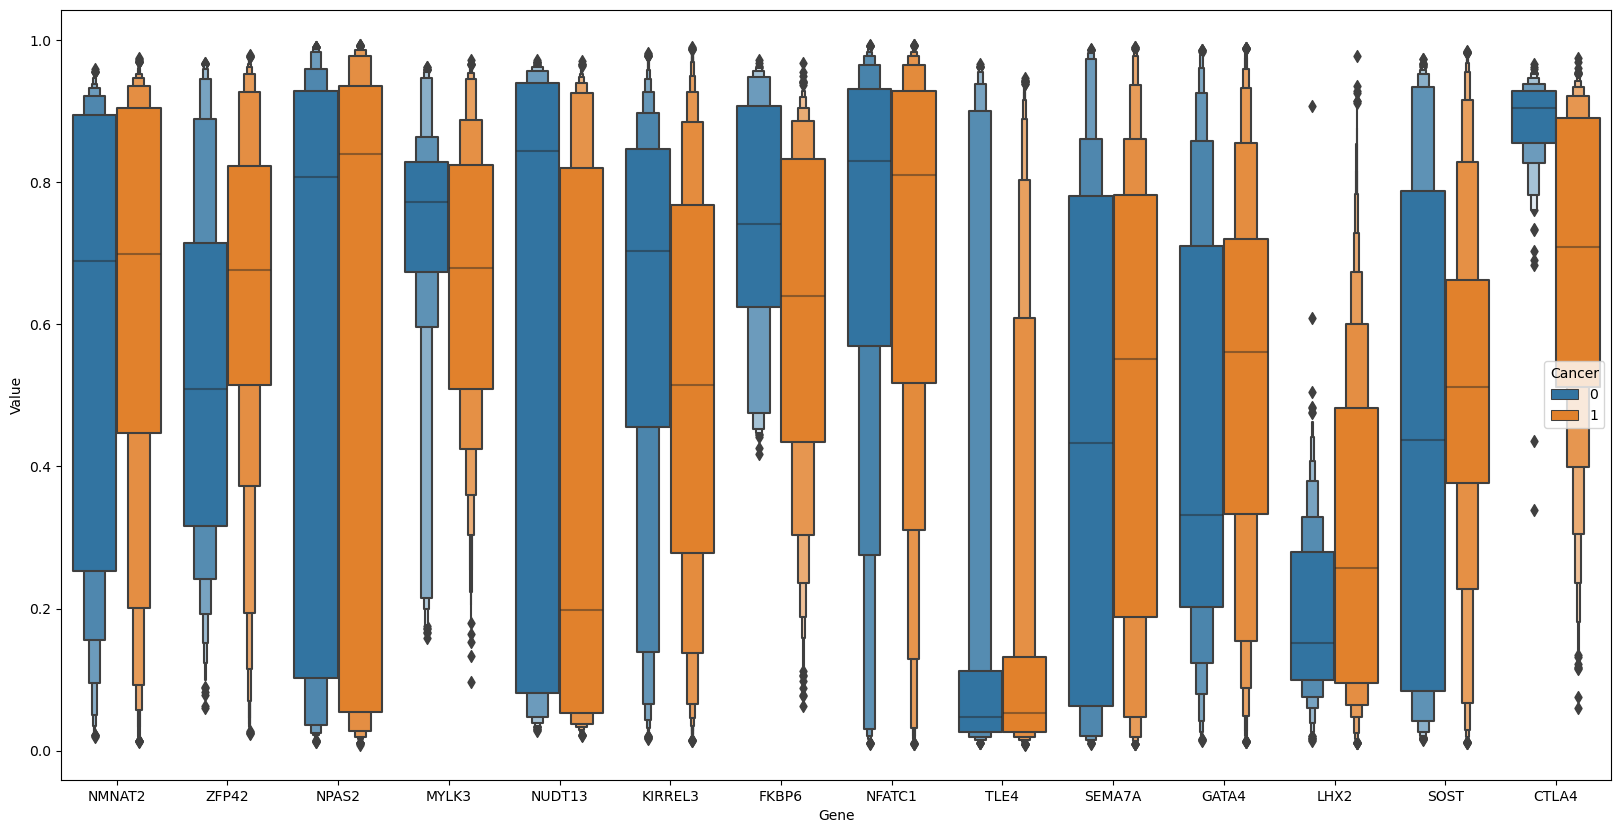

In [55]:
#making the placeholder for the graph
_, ax = plt.subplots(1,1, figsize=(20, 10))
sns.boxenplot(
    gene_value_df,
    x="Gene",
    y="Value",
    hue="Cancer",
    ax=ax,
)

### Correlation

Text(0.5, 1.0, 'Diff')

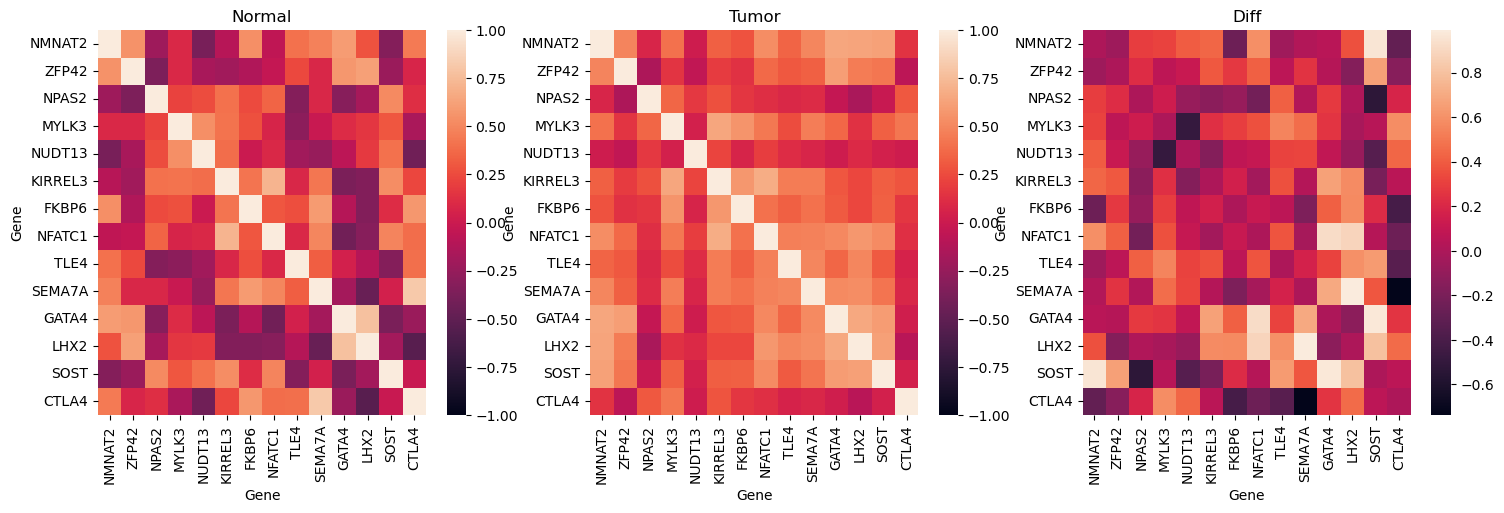

In [56]:
_, ax = plt.subplots(1, 3, figsize=(18, 5))

#GENES = ['vgbhg', 'hhtht']
GENES = GENES

normal_corr = normal_genes_df.T[GENES].corr()
tumor_corr = tumor_genes_df.T[GENES].corr()

kwargs = dict(
    vmax=1,
    vmin=-1,
)

sns.heatmap(normal_corr, ax=ax[0], **kwargs)
ax[0].set_title("Normal")

sns.heatmap(tumor_corr, ax=ax[1], **kwargs)
ax[1].set_title("Tumor")

sns.heatmap(tumor_corr - normal_corr, ax=ax[2])
ax[2].set_title("Diff")